In [85]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import random

In [86]:
worker1=pd.read_csv("./Saved Training data/ActionStateRewardlog0.csv",index_col=0)
worker2=pd.read_csv("./Saved Training data/ActionStateRewardlog1.csv",index_col=0)
worker3=pd.read_csv("./Saved Training data/ActionStateRewardlog2.csv",index_col=0)
worker4=pd.read_csv("./Saved Training data/ActionStateRewardlog3.csv",index_col=0)

In [87]:


import json
 
# Opening JSON file
with open('Min_max_values_for_qdelay.json', 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)
 
print(json_object)
print(type(json_object))


# Min-Max scaling
df=worker1
col_name="reward"
min_value = df[col_name].min()
max_value = df[col_name].max()

df['current_qdelay']=(df['current_qdelay']*(json_object["max_value"] - json_object["min_value"]))/15+ json_object["min_value"]

df['current_qdelay']=df['current_qdelay']*-1

df['scaled_reward'] = (df[col_name] - min_value) / (max_value - min_value) 

print(df['scaled_reward'].min())
print(df['scaled_reward'].max())

print(df['current_qdelay'].min())
print(df['current_qdelay'].max())


df['predicted_qdelay'] = (df['current_qdelay'] * df['scaled_reward'])

worker1=df

{'max_value': 480000, 'min_value': 0}
<class 'dict'>
0.0
1.0
-0.0
410000.0


In [88]:
worker1["current_qdelay"].max()

410000.0

In [89]:
worker1["scaled_reward"].max()

1.0

In [90]:
worker1["scaled_reward"].min()

0.0

In [91]:
print(worker1['predicted_qdelay'].min())
print(worker1['predicted_qdelay'].max())

-0.0
390000.0


In [92]:
worker1

,burst_allowance,drop_prob,current_qdelay,qdelay_old,accu_prob,measurement_start,tot_pkts,tot_bytes,length,len_bytes,drops,ecn,action,reward,scaled_reward,predicted_qdelay
0,0.333333,-0.987818,90000.0,0.187500,0.000000,0.931588,0.028145,0.007424,0.140065,0.099284,0.000000,0.0,0.007918,-5.3125,0.585366,52682.926829
1,0.000000,0.007017,170000.0,0.354167,0.077245,0.028803,0.134865,0.117470,0.325733,0.215098,0.181416,0.0,-1.000000,-0.0000,1.000000,170000.000000
2,0.333333,-1.000000,-0.0,0.000000,0.000000,0.998545,0.137096,0.027774,0.000000,0.000000,0.000000,0.0,0.584351,-12.5000,0.024390,-0.000000
3,0.000000,0.589100,400000.0,0.833333,0.000000,0.919119,0.058668,0.074472,0.172638,0.195566,0.086283,1.0,-0.388594,-11.5625,0.097561,39024.390244
4,0.000000,-0.390377,370000.0,0.770833,0.000000,0.108479,0.291892,0.240751,0.534202,0.486382,0.205752,0.0,-0.973720,-2.5000,0.804878,297804.878049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,0.333333,-1.000000,-0.0,0.000000,0.000000,0.998545,0.137096,0.027774,0.000000,0.000000,0.000000,0.0,-0.368897,-5.9375,0.536585,-0.000000
1322,0.000000,-0.369030,190000.0,0.395833,0.094286,0.483458,0.028831,0.036628,0.482085,0.546109,0.061947,1.0,-0.999244,-0.9375,0.926829,176097.560976
1323,0.444444,-0.999245,30000.0,0.062500,0.000000,0.020283,0.070411,0.061603,0.071661,0.049120,0.000000,0.0,-0.973331,-3.1250,0.756098,22682.926829
1324,0.000000,-0.973546,100000.0,0.208333,0.031169,0.764256,0.595847,0.748577,0.084691,0.095938,0.371681,0.0,-0.976280,-2.8125,0.780488,78048.780488


In [93]:
worker1.describe()


,burst_allowance,drop_prob,current_qdelay,qdelay_old,accu_prob,measurement_start,tot_pkts,tot_bytes,length,len_bytes,drops,ecn,action,reward,scaled_reward,predicted_qdelay
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,0.069801,-0.726914,108031.674208,0.225066,0.098498,0.624218,0.208102,0.229574,0.174358,0.177756,0.135199,0.281297,-0.723017,-3.419118,0.733142,85743.847257
std,0.153284,0.377296,86729.084455,0.180686,0.136475,0.336259,0.195802,0.258938,0.134462,0.137249,0.142267,0.449802,0.382838,2.714357,0.211852,76795.765116
min,0.000000,-1.000000,-0.000000,0.000000,0.000000,0.001496,0.000392,0.000287,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.812500,0.000000,-0.000000
25%,0.000000,-0.983628,60000.000000,0.125000,0.000000,0.224522,0.058466,0.046142,0.078176,0.075865,0.000000,0.000000,-0.981912,-4.375000,0.658537,36585.365854
50%,0.000000,-0.916647,90000.000000,0.187500,0.057172,0.702535,0.137096,0.111534,0.149837,0.158667,0.075221,0.000000,-0.913648,-2.812500,0.780488,68292.682927
75%,0.000000,-0.579867,140000.000000,0.291667,0.146427,0.919119,0.293020,0.324348,0.257329,0.252411,0.258850,1.000000,-0.578374,-1.875000,0.853659,111219.512195
max,1.000000,0.757260,410000.000000,0.854167,0.979885,0.998545,0.790139,0.994898,0.586319,0.627288,0.435841,1.000000,0.953480,-0.000000,1.000000,390000.000000


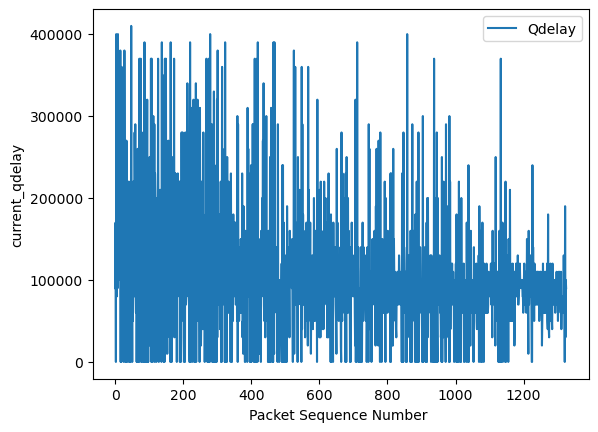

In [94]:
plt.plot(worker1.index,worker1['current_qdelay'],'-', label="Qdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('current_qdelay')
plt.title("")
plt.legend()

plt.savefig("graph1.png", dpi=100,facecolor='white', transparent=False)
plt.show()

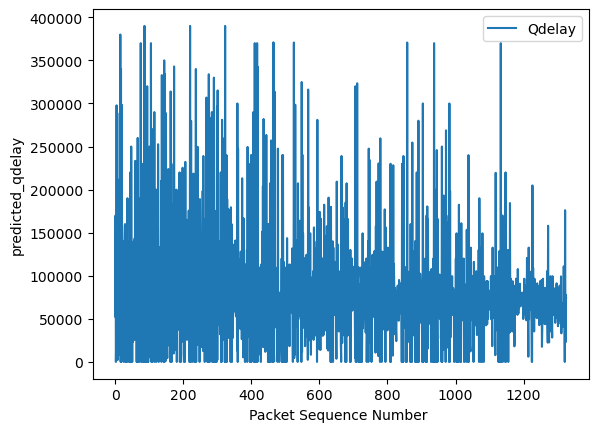

In [95]:
plt.plot(worker1.index,worker1['predicted_qdelay'],'-', label="Qdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('predicted_qdelay')
plt.title("")
plt.legend()

plt.savefig("graph1.png", dpi=100,facecolor='white', transparent=False)
plt.show()

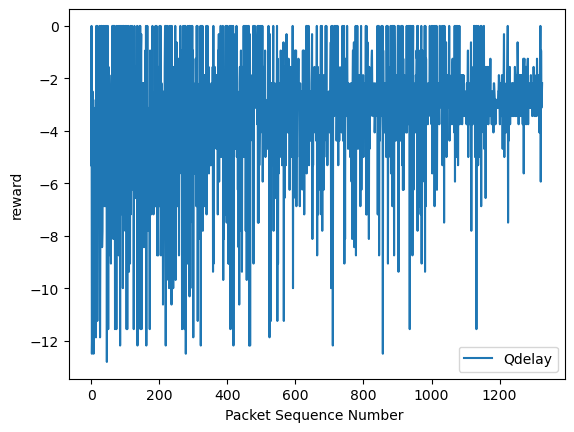

In [96]:
plt.plot(worker1.index,worker1['reward'],'-', label="Qdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('reward')
plt.title("")
plt.legend()

plt.savefig("graph1.png", dpi=100,facecolor='white', transparent=False)
plt.show()